Making a perceptron to predict the placement of the students based on the cgpa and resume score.

--> The credit for this code goes to CampusX (https://www.youtube.com/watch?v=X7iIKPoZ0Sw&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=4).

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
data = pd.read_csv("../../Downloads/Data for ML/placement.csv")
data.head(4)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1


Let check the data can be linearly separable or not by plotting. 

<Axes: xlabel='cgpa', ylabel='resume_score'>

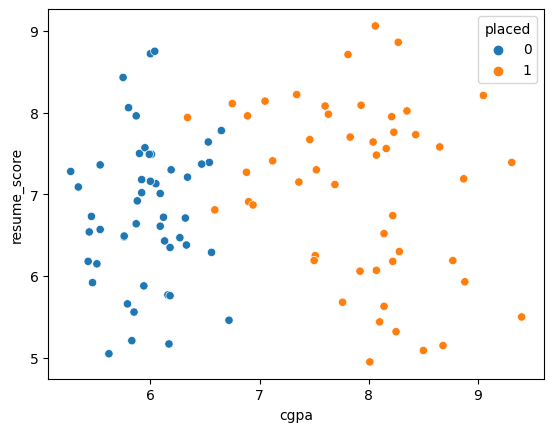

In [27]:
sns.scatterplot(x=data['cgpa'], y= data['resume_score'], hue = data['placed'])

So, the data can be separable linearly and we can use perceptron to do that. 

In [43]:
X = data.iloc[:, 0:2]
Y = data.iloc[:, -1]
from sklearn.linear_model import Perceptron
model = Perceptron()

In [32]:
model.fit(X,Y)

Perceptron()

Let check the weights of the features (cgpa, resume_score) in the model. 

In [33]:
model.coef_                   

array([[ 40.26, -36.  ]])

For seeing biases.

In [34]:
model.intercept_

array([-25.])

How perceptron looks like graphically. 

/Users/fnuarjun/PycharmProjects/ML/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

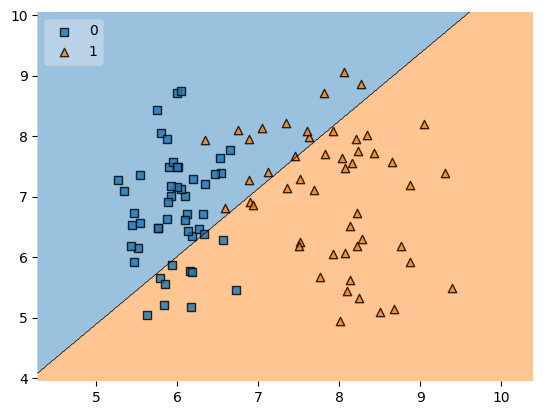

In [41]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, Y.values, clf=model, legend=2)

Training perceptron scratch. 

In [106]:
import numpy as np

def step(z):
    return 1 if z > 0 else 0 

def perceptron(X,Y):
  
    lr = 0.1
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])    # X.shape = (100,3) and initializing weights as 1.
    
    epoch = 1000
    for i in range(epoch):
        j = np.random.randint(0, X.shape[0])
        y_hat = step(np.dot(X[j],weights))
        weights = weights - lr*(Y[j] - y_hat)*X[j]
        
    return weights[0], weights[1:]

In [107]:
X = data.iloc[:, 0:2].values
Y = data.iloc[:, -1].values
intercept_, coeff_ = perceptron(X,Y)
print(coeff_, intercept_)
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])
print(f'{m = }, {b  = }')

[292.752 330.657] 49.600000000000435
m = -0.8853645923116692, b  = -0.15000438520884304


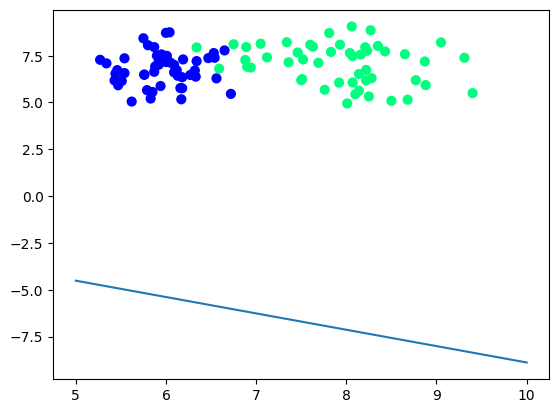

In [105]:
x_input = np.linspace(5,10,100)
y_input = m*x_input + b

plt.plot(x_input,y_input)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter', s=40)